In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#import for ignore warnings
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
#Read the csv file.
Dataframe = pd.read_csv('Mall_Customers01.csv')

In [4]:
print(Dataframe)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [5]:
#shape of the dataset.
Dataframe.shape

(200, 5)

In [6]:
#information of dataset.
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#Missing value computation
Dataframe.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# Encoding the string value into interger.
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
Dataframe.iloc[:,[1]]=l.fit_transform(Dataframe.iloc[:,[1]])
Dataframe

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [9]:
Dataframe.rename(columns = {'CustomerID' : 'CustomerId','Gender':'Gender','Age':'Age','Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [10]:
Dataframe

,CustomerId,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


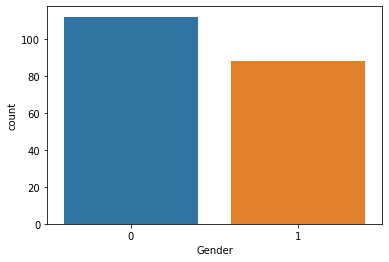

In [11]:
#Comparsion of Gender
sns.countplot(data = Dataframe,x = 'Gender')
plt.show()

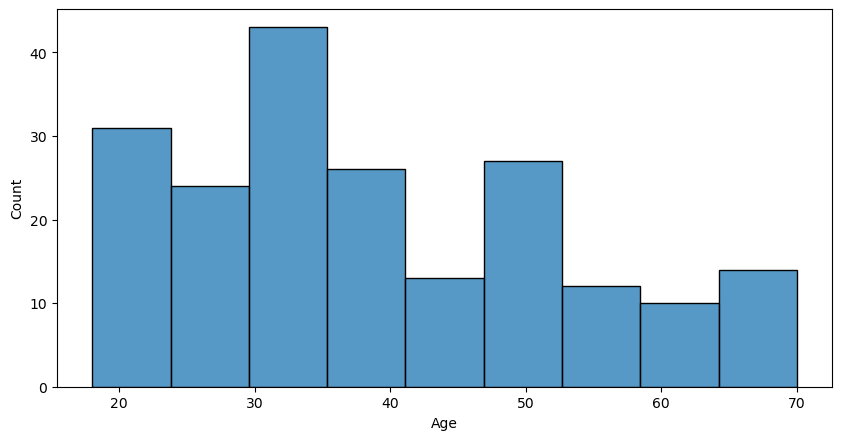

In [12]:
#Plotting the distribution of Age.
plt.figure(figsize=(10,5),dpi=100)
sns.histplot(data=Dataframe,x = 'Age')
plt.show()

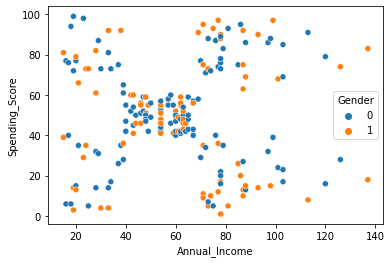

In [13]:
sns.scatterplot(y='Spending_Score', x='Annual_Income',hue='Gender', data=Dataframe)
plt.show()

In [14]:
# Getting x value
x = Dataframe.iloc[:,3:5].values

In [15]:
# Normalisation Process
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
y=ss.fit_transform(x)

In [16]:
# K-means 
from sklearn.cluster import KMeans
inertia = []
for i in range(1,15):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(y)
    inertia.append(km.inertia_)
print(inertia)

[399.99999999999994, 269.1425070447921, 157.70400815035939, 108.92131661364358, 65.56840815571681, 55.057348270385965, 44.86475569922555, 37.19454682305568, 32.34583777956662, 29.131236804068436, 26.570818021358846, 23.680199553998794, 21.49205834866663, 18.913683405089493]


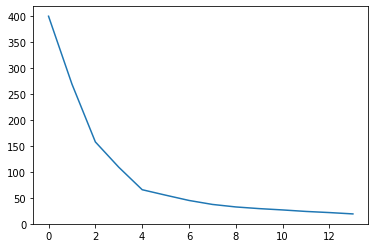

In [19]:
#Plotting the result of inertia
plt.plot(inertia)
plt.show()

In [20]:
# Number of Cluster
km=KMeans(n_clusters=5,init='k-means++')
result=km.fit_predict(x)

In [21]:
#Fit the result in a series
df1=pd.Series(result)

In [22]:
# Add the result columns Dataframe
Dataframe['Group'] = df1
Dataframe.columns = ['customerID','Gender','Age','AnnualIncome','SpendingScore','Group']
Dataframe

,customerID,Gender,Age,AnnualIncome,SpendingScore,Group
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4
...,...,...,...,...,...,...
195,196,0,35,120,79,0
196,197,0,45,126,28,3
197,198,1,32,126,74,0
198,199,1,32,137,18,3


In [24]:
# To know number of Group
Dataframe['Group'].unique()

array([4, 2, 1, 0, 3])

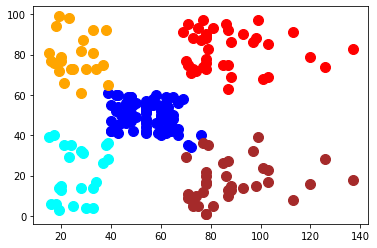

In [25]:
# Display the cluster
plt.scatter(x[result==0,0],x[result==0,1],s=100,c='red')
plt.scatter(x[result==1,0],x[result==1,1],s=100,c='blue')
plt.scatter(x[result==2,0],x[result==2,1],s=100,c='orange')
plt.scatter(x[result==3,0],x[result==3,1],s=100,c='brown')
plt.scatter(x[result==4,0],x[result==4,1],s=100,c='cyan')
plt.show()

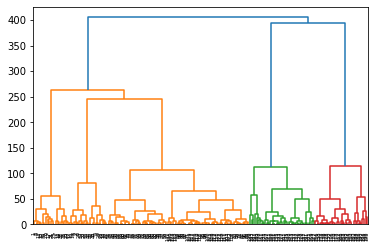

In [26]:
#Hierarchy clustering
import scipy.cluster.hierarchy as sch
dent = sch.dendrogram(sch.linkage(x,method='ward'))

In [27]:
#accurancy for clustering
from sklearn.metrics import silhouette_score
silhouette_score(x,result)

0.553931997444648